# Liionpack demo

Andrew Weng

March 10, 2022

In [1]:
import liionpack as lp
import pybamm
import numpy as np

## Configure the parameters and define the netlist

In [2]:

I_mag = 5.0
OCV_init = 4.0  # used for intial guess
Ri_init = 5e-2  # used for intial guess
R_busbar = 1.5e-3
R_connection = 1e-2
Np = 4
Ns = 2
Nbatt = Np * Ns
netlist = lp.setup_circuit(
    Np=Np, Ns=Ns, Rb=R_busbar, Rc=R_connection, Ri=Ri_init, V=OCV_init, I=I_mag
)


In [3]:
print(netlist)

# Fix a pdflatex error before uncommenting out this line
# lp.draw_circuit(netlist, cpt_size=1.0, dpi=150, node_spacing=2.5)



    desc  node1  node2    value  node1_x  node1_y  node2_x  node2_y
0   Rbn0      1      2  0.00150        0        0        1        0
1   Rbn1      2      3  0.00150        1        0        2        0
2   Rbn2      3      4  0.00150        2        0        3        0
3    Rc0      5      1  0.01000        0        1        0        0
4     V0      9      5  4.00000        0        2        0        1
5    Ri0     13      9  0.05000        0        3        0        2
6    Rc1     17     13  0.01000        0        4        0        3
7     V1     21     17  4.00000        0        5        0        4
8    Ri1     25     21  0.05000        0        6        0        5
9    Rc2      6      2  0.01000        1        1        1        0
10    V2     10      6  4.00000        1        2        1        1
11   Ri2     14     10  0.05000        1        3        1        2
12   Rc3     18     14  0.01000        1        4        1        3
13    V3     22     18  4.00000        1        

## Set up the experiment

In [15]:

experiment = pybamm.Experiment(
    [
        "Charge at 0.5A for 100 hours or until 4.1V",
        "Hold at 4.1V for 100 hours or until 50 mA",
        "Rest for 15 minutes",
        "Discharge at 0.5A for 30 minutes",
        "Rest for 15 minutes",
    ],
    period="10 seconds",
)



### Initialize the parameter set

In [16]:

chemistry = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)



### Initialize the battery model

In [17]:
SPMe = pybamm.models.full_battery_models.lithium_ion.SPMe()

In [18]:
SPMe.variable_names()[:10]

['Time',
 'Time [s]',
 'Time [min]',
 'Time [h]',
 'x',
 'x [m]',
 'x_n',
 'x_n [m]',
 'x_s',
 'x_s [m]']

In [19]:
SPMe.variables.search("X-averaged")

Leading-order x-averaged negative electrode porosity
Leading-order x-averaged negative electrode porosity change
Leading-order x-averaged negative electrode tortuosity
Leading-order x-averaged negative electrolyte tortuosity
Leading-order x-averaged positive electrode porosity
Leading-order x-averaged positive electrode porosity change
Leading-order x-averaged positive electrode tortuosity
Leading-order x-averaged positive electrolyte tortuosity
Leading-order x-averaged separator porosity
Leading-order x-averaged separator porosity change
Leading-order x-averaged separator tortuosity
Sum of x-averaged negative electrode electrolyte reaction source terms
Sum of x-averaged negative electrode interfacial current densities
Sum of x-averaged positive electrode electrolyte reaction source terms
Sum of x-averaged positive electrode interfacial current densities
X-averaged SEI concentration [mol.m-3]
X-averaged SEI film overpotential
X-averaged SEI film overpotential [V]
X-averaged SEI interfa

In [20]:
output_variables = [
    "X-averaged negative particle surface concentration [mol.m-3]",
    "X-averaged positive particle surface concentration [mol.m-3]",
]

## Run the solver

In [21]:
%pdb

Automatic pdb calling has been turned OFF


In [22]:
a = 4

In [23]:
b = 4
a
4
a / 0

ZeroDivisionError: division by zero

In [24]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=0.5
)

ValueError: Only constant current operations are supported

## Plot the outputs

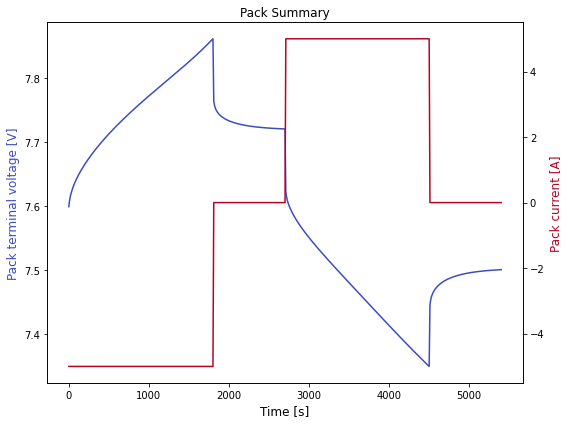

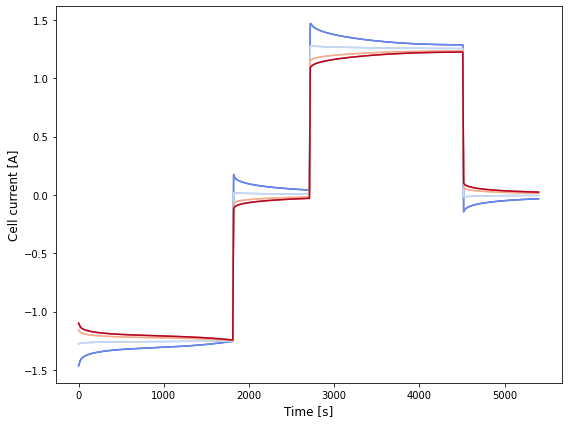

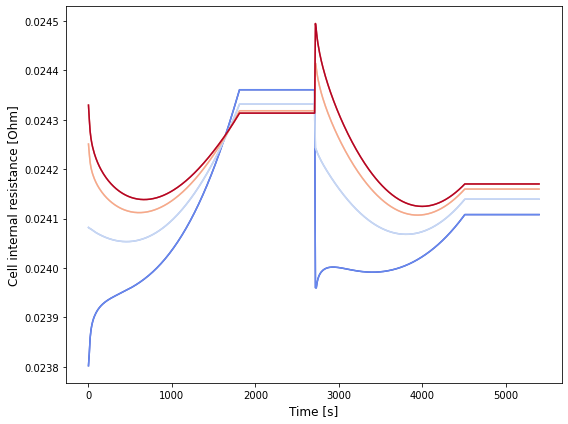

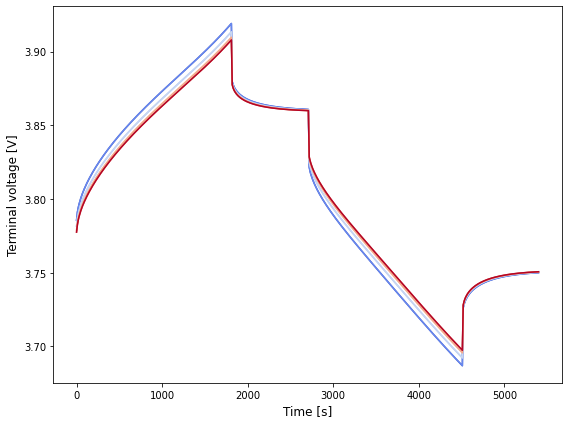

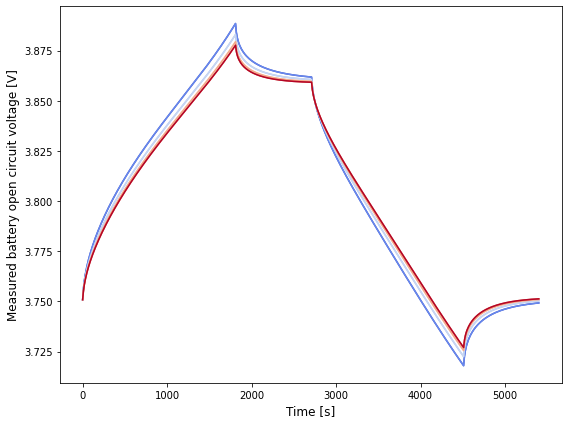

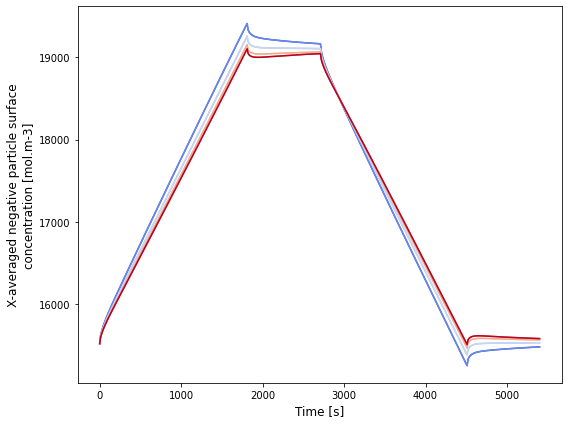

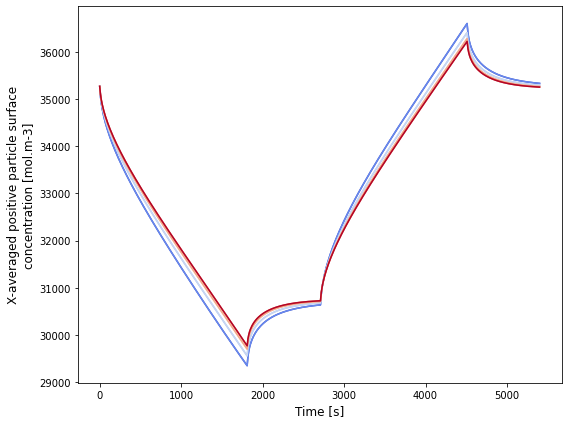

In [21]:
lp.plot_output(output)
